As this code uses Deon's Reddit account to scrape data and relies on models and generated datasets stored on his google drive, it may not be possible to run this code without us sending the required inputs. So in case the project evaluation includes locally testing our code, please contact us for the models and the dataset.

# CONNECTING TO REDDIT API

In [2]:
pip install praw

  Obtaining dependency information for praw from https://files.pythonhosted.org/packages/81/6a/21bc058bcccbe03f6a0895bf1bd60c805f0c526aa4e9bfaac775ed0b299c/praw-7.7.1-py3-none-any.whl.metadata
  Using cached prawcore-2.3.0-py3-none-any.whl (16 kB)
  Using cached update_checker-0.18.0-py3-none-any.whl (7.0 kB)
Using cached praw-7.7.1-py3-none-any.whl (191 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import praw

In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
# Read-only instance
reddit_read_only = praw.Reddit(client_id="RjgdYl3titIwKlHeM4bQVg",         # your client id
                               client_secret="xlfd2ixfHtiNuLLr12kIM4WQV9CW3A",      # your client secret
                               user_agent="Scraping",check_for_async=False)        # your user agent

reddit_authorized = praw.Reddit(client_id="RjgdYl3titIwKlHeM4bQVg",         # your client id
                                client_secret="xlfd2ixfHtiNuLLr12kIM4WQV9CW3A",      # your client secret
                                user_agent="Scraping",        # your user agent
                                username="SuicidePrevPythonPrj",        # your reddit username
                                password="Asdfghjkl1234567$#",check_for_async=False)        # your reddit password
                               

In [5]:
print(reddit_authorized.user.me())

SuicidePrevPythonPrj


In [5]:
subreddit = reddit_read_only.subreddit("SuicideWatch")

In [6]:
print("Display Name:", subreddit.display_name)

Display Name: SuicideWatch


# EXTRACT POSTS FROM SUBREDDITS

In [7]:
#Get the data from the subreddits mentioned
def get_subreddits(subreddits, num_posts):
    title = []
    text = []
    post_id = []
    reddit_detail = []

    for sub in subreddits:
        subreddit_obj = reddit_read_only.subreddit(sub)
        for posts in subreddit_obj.top(limit=num_posts):
            title.append(posts.title)
            text.append(posts.selftext)
            post_id.append(posts.id)
            reddit_detail.append(posts.subreddit)

    res_dict = {"id": post_id, "subreddit": reddit_detail,
                "title": title, "text": text}

    return res_dict

In [10]:
subreddits = ['SuicideWatch', 'depression', 'Anxiety']
df1 = pd.DataFrame(data = get_subreddits(subreddits,5000))

In [11]:
df1

,id,subreddit,title,text
0,ma96y1,SuicideWatch,It’s kinda funny how quickly one can go from “...,
1,f9d5go,SuicideWatch,Anyone else not want to die and not want to ki...,
2,kbqsnq,SuicideWatch,My mom died 3 hours ago,I thought id be ready for this some day but i ...
3,e8gjky,SuicideWatch,Raped in front of my girlfriend. feeling like ...,"\n\nI don't know what to say or do, I just fe..."
4,jnrz57,SuicideWatch,'If you were actually suicidal you'd have kill...,FUCK YOU FUCK YOU FUCK YOU \nYOU ABSOLUTE DUMB...
...,...,...,...,...
2954,rv4ybr,Anxiety,I'd rather die than feel like this,School started today and I woke up with my hea...
2955,15s26nk,Anxiety,How many of yall are raw dogging anxiety and l...,like no medication no therapy ? Because I am a...
2956,11796ss,Anxiety,Anyone else wake up and instantly feel like th...,
2957,iqahuc,Anxiety,Anyone else have their health issues brushed o...,"\nKind of a vent post, but has anyone else had..."


In [12]:
subreddits2 = ['movies', 'popular', 'books','Jokes']
df2 = pd.DataFrame(data = get_subreddits(subreddits2,5000))

In [13]:
df1.to_csv('redditscraping.csv', index=False)

In [14]:
df2.to_csv('non_suicide_data.csv', index=False)

In [6]:
df1 = pd.read_csv('redditscraping.csv')
df2 = pd.read_csv('non_suicide_data.csv')

In [15]:
# Saved to Google Drive
import os
from google.colab import drive
# Mounting Drive on the file path containing the scraped data.
drive.mount('/content/gdrive', force_remount = True)

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
%cd /content/gdrive/MyDrive/NLP

/content/gdrive/MyDrive/NLP


# MERGE BOTH DATASETS

In [7]:
df = pd.concat([df1, df2], axis=0)
df.to_csv('mergedData.csv', index=False)

In [18]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
scrapedData = pd.read_csv("mergedData.csv")
print(scrapedData.head())

       id     subreddit                                              title  \
0  ma96y1  SuicideWatch  It’s kinda funny how quickly one can go from “...   
1  f9d5go  SuicideWatch  Anyone else not want to die and not want to ki...   
2  kbqsnq  SuicideWatch                            My mom died 3 hours ago   
3  e8gjky  SuicideWatch  Raped in front of my girlfriend. feeling like ...   
4  jnrz57  SuicideWatch  'If you were actually suicidal you'd have kill...   

                                                text  
0                                                NaN  
1                                                NaN  
2  I thought id be ready for this some day but i ...  
3   \n\nI don't know what to say or do, I just fe...  
4  FUCK YOU FUCK YOU FUCK YOU \nYOU ABSOLUTE DUMB...  


In [9]:
scrapedData

,id,subreddit,title,text
0,ma96y1,SuicideWatch,It’s kinda funny how quickly one can go from “...,NaN
1,f9d5go,SuicideWatch,Anyone else not want to die and not want to ki...,NaN
2,kbqsnq,SuicideWatch,My mom died 3 hours ago,I thought id be ready for this some day but i ...
3,e8gjky,SuicideWatch,Raped in front of my girlfriend. feeling like ...,"\n\nI don't know what to say or do, I just fe..."
4,jnrz57,SuicideWatch,'If you were actually suicidal you'd have kill...,FUCK YOU FUCK YOU FUCK YOU \nYOU ABSOLUTE DUMB...
...,...,...,...,...
8239,gw4fy6,Jokes,A cop pulls over an old lady for speeding on a...,"When she opens her wallet, he notices a concea..."
8240,fh93cl,Jokes,I was talking to a scammer the other day.,Me: “Hello.”\n\nNOT-Microsoft support: “Hello...
8241,ayptmw,Jokes,I like my women like I like my slaves,Educated and free.
8242,9fqdph,Jokes,"A blonde is overweight, so her doctor puts her...","A blonde is overweight, so her doctor puts her..."


# DATA PREPROCESSING

In [12]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Importing the necessary libraries to process the given text
 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
 
import re

[nltk_data] Downloading package punkt to C:\Users\Siddhanth P.
[nltk_data]     Rao\AppData\Roaming\nltk_data...
[nltk_data] Error downloading 'punkt' from
[nltk_data]     <https://raw.githubusercontent.com/nltk/nltk_data/gh-
[nltk_data]     pages/packages/tokenizers/punkt.zip>:   HTTP Error
[nltk_data]     503: first byte timeout
[nltk_data] Downloading package stopwords to C:\Users\Siddhanth P.
[nltk_data]     Rao\AppData\Roaming\nltk_data...
[nltk_data] Error downloading 'stopwords' from
[nltk_data]     <https://raw.githubusercontent.com/nltk/nltk_data/gh-
[nltk_data]     pages/packages/corpora/stopwords.zip>:   HTTP Error
[nltk_data]     503: first byte timeout
[nltk_data] Downloading package wordnet to C:\Users\Siddhanth P.
[nltk_data]     Rao\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to C:\Users\Siddhanth P.
[nltk_data]     Rao\AppData\Roaming\nltk_data...


In [18]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [10]:
import nltk

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
 
import re

In [11]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
 
import re

In [12]:
# Set of stopwords
stop_words = set(stopwords.words('english'))
 
# Instantiating a lemmatizer
lemmatizer = WordNetLemmatizer()
 
# Function that preprocesses the given text.
def cleanText(post):
    # Splitting the sentence into words
    text = re.sub('[^a-zA-Z]', ' ', post)  #remove special characters
    text = text.lower()   
    text = text.split(' ')
    text = [lemmatizer.lemmatize(word) for word in text]
    #remove stop words
    text = [word for word in text if word not in stop_words]  
    
    cleanedText = ' '.join(text)
    return cleanedText


In [13]:
scrapedData['text']

0                                                     NaN
1                                                     NaN
2       I thought id be ready for this some day but i ...
3        \n\nI don't know what to say or do, I just fe...
4       FUCK YOU FUCK YOU FUCK YOU \nYOU ABSOLUTE DUMB...
                              ...                        
8239    When she opens her wallet, he notices a concea...
8240     Me: “Hello.”\n\nNOT-Microsoft support: “Hello...
8241                                   Educated and free.
8242    A blonde is overweight, so her doctor puts her...
8243    \nOne day a Cop pulls a van over and when he w...
Name: text, Length: 8244, dtype: object

In [14]:
scrapedData['title']

0       It’s kinda funny how quickly one can go from “...
1       Anyone else not want to die and not want to ki...
2                                 My mom died 3 hours ago
3       Raped in front of my girlfriend. feeling like ...
4       'If you were actually suicidal you'd have kill...
                              ...                        
8239    A cop pulls over an old lady for speeding on a...
8240            I was talking to a scammer the other day.
8241                I like my women like I like my slaves
8242    A blonde is overweight, so her doctor puts her...
8243                  The penguin joke (my favorite joke)
Name: title, Length: 8244, dtype: object

In [15]:
import numpy as np

# ASSIGNING LABELS AND CLEANING THE DATASET 

In [16]:
labels = scrapedData['subreddit'].tolist()

#Assigning labels to the dataset
actualLabels = []
for i in range(len(labels)):
  if (labels[i] == 'SuicideWatch' or labels[i] == 'depression' or labels[i] == 'Anxiety'):
    actualLabels.append(1)
  else:
    actualLabels.append(0)

postText = scrapedData['text'].tolist()
postTitle = scrapedData['title'].tolist()

l = len(postText)

corpus = []

for i in range(l):
  s = postTitle[i]
  if (type(postText[i]) != float):
    s += ' '
    s += postText[i]
  #Preprocessing fucntion run for each (postTitle + postText)
  corpus.append(cleanText(s))

In [17]:
print(actualLabels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# CONVERTING TEXT TO VECTOR

IMPORT LIBRARIES

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

 TFIDF VECTORIZATION

In [19]:
tf = TfidfVectorizer(ngram_range = (1, 2))

In [20]:
tf_vec = tf.fit_transform(corpus)

# SPLIT DATASET TO TRAIN,TEST DATA (70% TRAIN,30% TEST)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(tf_vec, actualLabels, test_size = 0.3, shuffle = True, random_state = 42,)

# NAIVE BAYES CLASSIFICATION

In [22]:
#Tuning of hyperparameter alpha
parameters = {"alpha":[0.001, 0.005, 0.01, 0.075, 0.05, 0.025, 0.1, 0.25, 0.5, 0.75, 1, 5, 10, 50]}

#GridSearchCV does an exhaustive search over specified parameter values for an estimator
clf= GridSearchCV(MultinomialNB(),parameters, cv=10, scoring= "accuracy", return_train_score= True)
clf.fit(x_train, y_train)

#best value of alpha
alpha= clf.best_params_["alpha"] 
score= clf.best_score_
print("Best alpha value is ", alpha)
print("Best score value is ", score)

Best alpha value is  1
Best score value is  0.9596187175043328


In [23]:
#Best value of alpha is 0.5 and we us that with MultinomialNB
model1= MultinomialNB(alpha=1)
model1.fit(x_train, y_train)
y_pred= model1.predict(x_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1561
           1       0.96      0.96      0.96       913

    accuracy                           0.97      2474
   macro avg       0.97      0.97      0.97      2474
weighted avg       0.97      0.97      0.97      2474



In [25]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

CONFUSION MATRIX

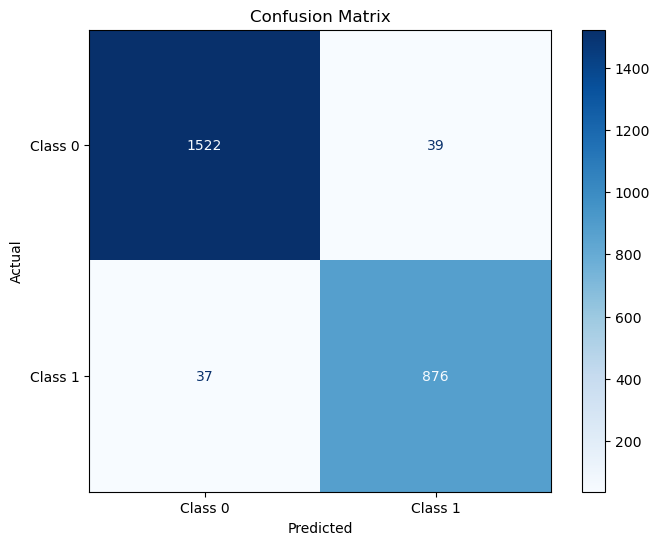

In [26]:
# Create the ConfusionMatrixDisplay object
cmd = ConfusionMatrixDisplay(cm, display_labels=["Class 0", "Class 1"])

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
cmd.plot(cmap="Blues", ax=ax, values_format="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# LSTM MODEL

In [41]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/2f/2f/3c84f675931ce3bcbc7e23acbba1e5d7f05ce769adab48322de57a9f5928/tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/126.5 kB ? eta -:--:--
     -------------------------------------- 126.5/126.5 kB 3.8 MB/s eta 0:00:00
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
  Obtaining dependency inform

In [27]:
""" Implementing an LSTM Model """

# Importing necessary libraries.

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# TOKENIZER (VECTORIZATION)

In [28]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

In [29]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

In [30]:
sequence = tokenizer.texts_to_sequences(corpus)
padded_sequence = pad_sequences(sequence, padding = 'post')

# TRAIN,TEST SPLIT

In [31]:
x_train, x_test, y_train, y_test = train_test_split(padded_sequence, actualLabels, test_size = 0.3, shuffle = True, random_state = 42)

# GLoVE EMBEDDING MATRIX

In [47]:
# Used a api of globe for faster access
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [34]:
embeddings_index = {}
with open('glove.6B.100d.txt', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = values[1:]
        vector = np.asarray(vector, dtype='float32')
        embeddings_index[word] = vector

embeddings_matrix = np.zeros((vocab_size,100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector

# LSTM MODEL

In [35]:
model = Sequential()

model.add(Embedding(vocab_size, 100, weights = [embeddings_matrix], trainable = False))
model.add(Bidirectional(LSTM(32, return_sequences = True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         2087300   
                                                                 
 bidirectional (Bidirection  (None, None, 64)          34048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2148293 (8.20 MB)
Trainable params: 60993 

In [37]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [38]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
  3/181 [..............................] - ETA: 1:17:36 - loss: 0.6866 - accuracy: 0.5312

KeyboardInterrupt: 

In [ ]:
model.evaluate(x_test,y_test)

78/78 [==============================] - 70s 892ms/step - loss: 0.1021 - accuracy: 0.9715


[0.10208655893802643, 0.9715202450752258]

In [ ]:
model.save('./lstm.h5')

In [ ]:
pred = model.predict(x_test)

In [ ]:
pred = pred>0.5

In [ ]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      1608
        True       0.95      0.98      0.96       885

    accuracy                           0.97      2493
   macro avg       0.97      0.97      0.97      2493
weighted avg       0.97      0.97      0.97      2493



# LOAD SAVED MODEL

In [ ]:
from tensorflow.keras.models import load_model
lstm_model=load_model("lstm.h5")

In [ ]:
pred_lstm = lstm_model.predict(x_test)

In [ ]:
pred_lstm = pred_lstm >0.5

In [ ]:
print(classification_report(pred_lstm, y_test))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      1608
        True       0.95      0.98      0.96       885

    accuracy                           0.97      2493
   macro avg       0.97      0.97      0.97      2493
weighted avg       0.97      0.97      0.97      2493



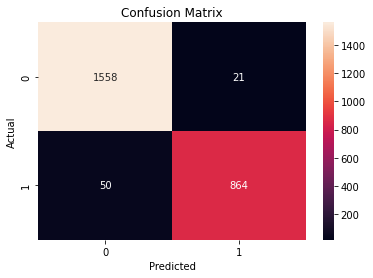

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_lstm)
f = sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# TESTING LSTM AND NAIVE BAYES

In [ ]:
def predict_naiveb(model,s):
    new_text = cleanText(s)
    vec = tf.transform([new_text])
    res = model.predict(vec)
    return res 

In [ ]:
def predict_lstm(model,s):
    new_text = cleanText(s)
    sequence = tokenizer.texts_to_sequences([new_text])
    padded_sequence = pad_sequences(sequence,padding='post',)
    res = model.predict(padded_sequence)
    return res[0]

In [ ]:
text = ['I dont want to live any more','Tie the rope','Tie the rope!!! I want to die',
        'My dog died in an accident','I want to take my own life','I want to end it all','I am fed up of seeing RCB performance','Live long and prosper']

In [ ]:
for t in text:
    res = predict_naiveb(model1,t)
    print("{} - {}".format(t, res[0]>0.50))

I dont want to live any more - True
Tie the rope - False
Tie the rope!!! I want to die - True
My dog died in an accident - False
I want to take my own life - True
I want to end it all - True
I am fed up of seeing RCB performance - False
Live long and prosper - True


In [ ]:
for t in text:
    res = predict_lstm(lstm_model,t)
    print("{} :{:.2f} - {}".format(t, res[0],res[0] > 0.5))

I dont want to live any more :0.90 - True
Tie the rope :0.17 - False
Tie the rope!!! I want to die :0.70 - True
My dog died in an accident :0.37 - False
I want to take my own life :0.94 - True
I want to end it all :0.62 - True
I am fed up of seeing RCB performance :0.26 - False
Live long and prosper :0.50 - True
